Activity Type Counts:
Type
Running    459
Cycling     29
Walking     18
Other        2
Name: count, dtype: int64

Missing Values Count:
Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

Column Names in the DataFrame:
Index(['Type', 'Distance (km)', 'Duration', 'Average Pace',
       'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)'],
      dtype='object')

Annual Statistics (2015-2018):
            Distance (km)  Average Heart Rate (bpm)
Date                                               
2015-12-31      13.602805                143.353659
2016-12-31      11.411667                143.388889
2017-12-31      12.935176                145.247059
2018-12-31      13.339063                148.125000

Weekly Statistics (2015-2018):
            Distance (km)  Average Heart Rate (bpm)
Date        

C:\Users\KIIT\AppData\Local\Temp\ipykernel_288\21130966.py:58: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_stats = runs_subset_2015_2018.resample('Y').agg({


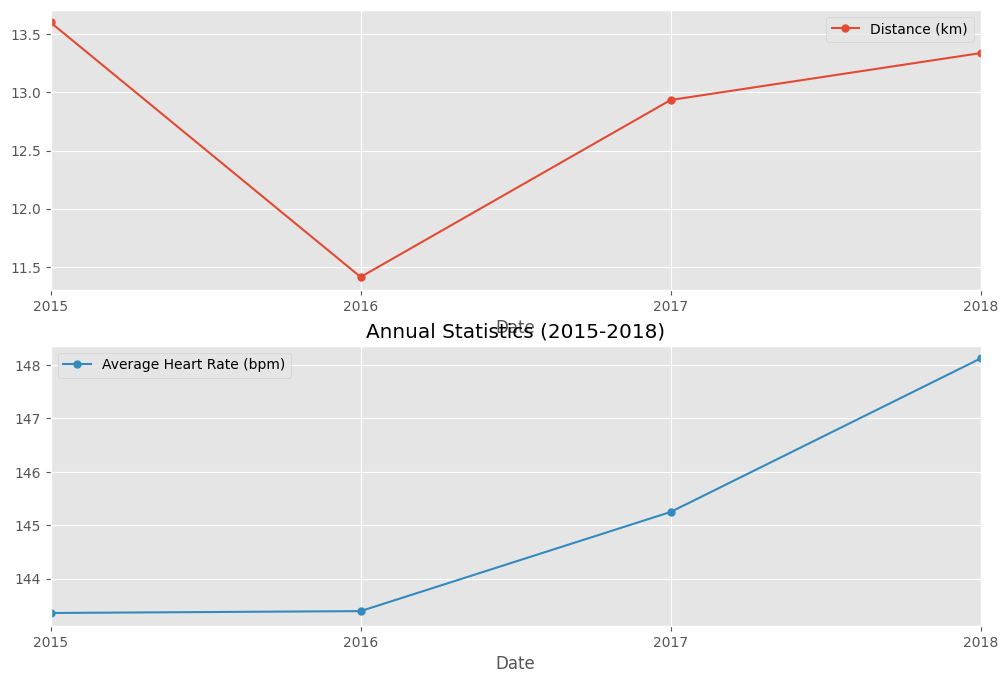

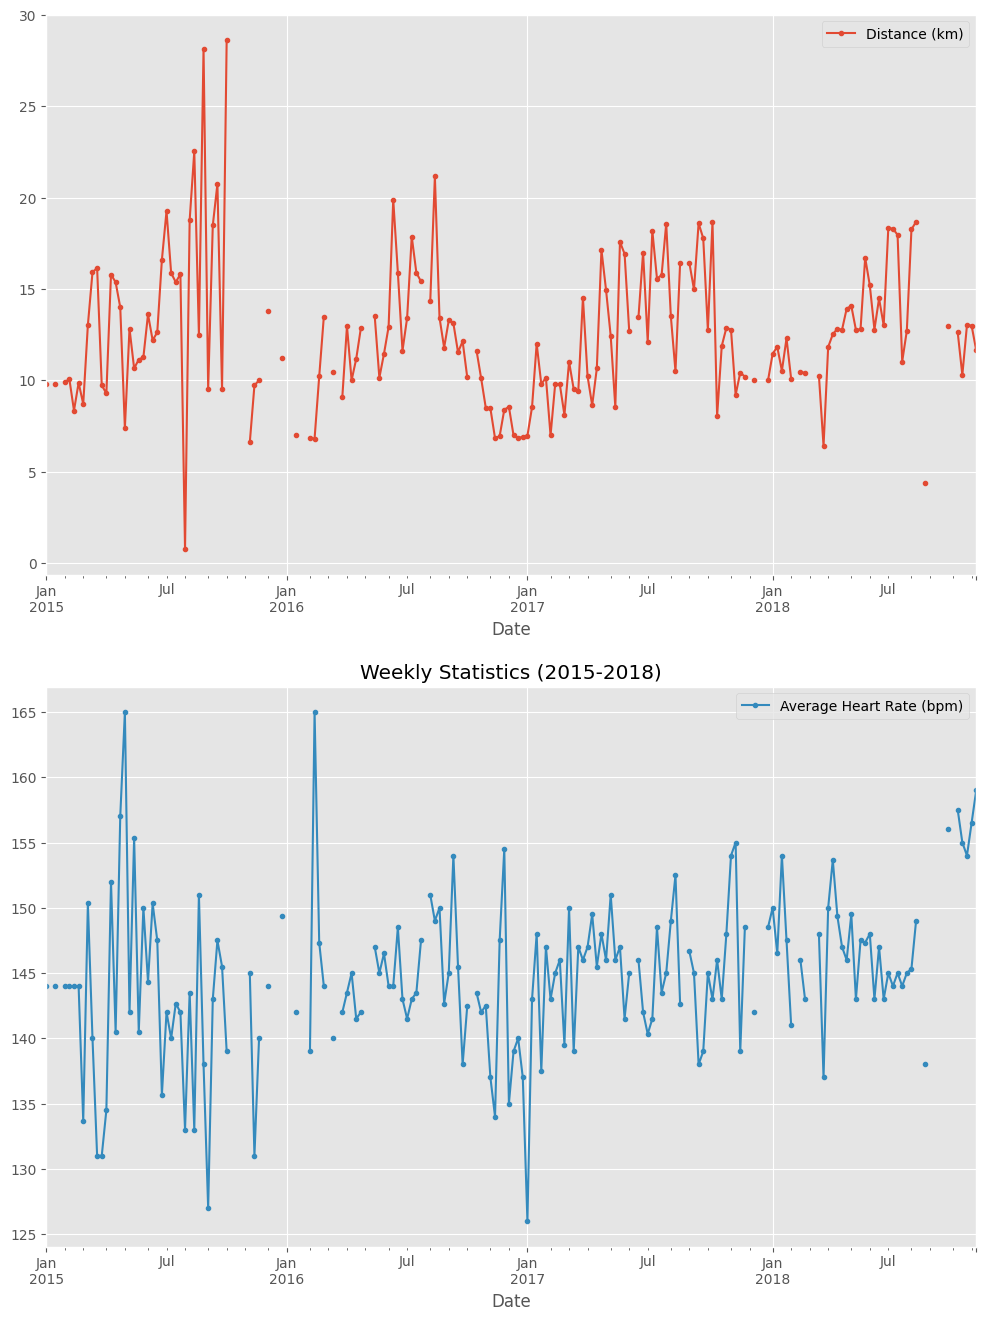

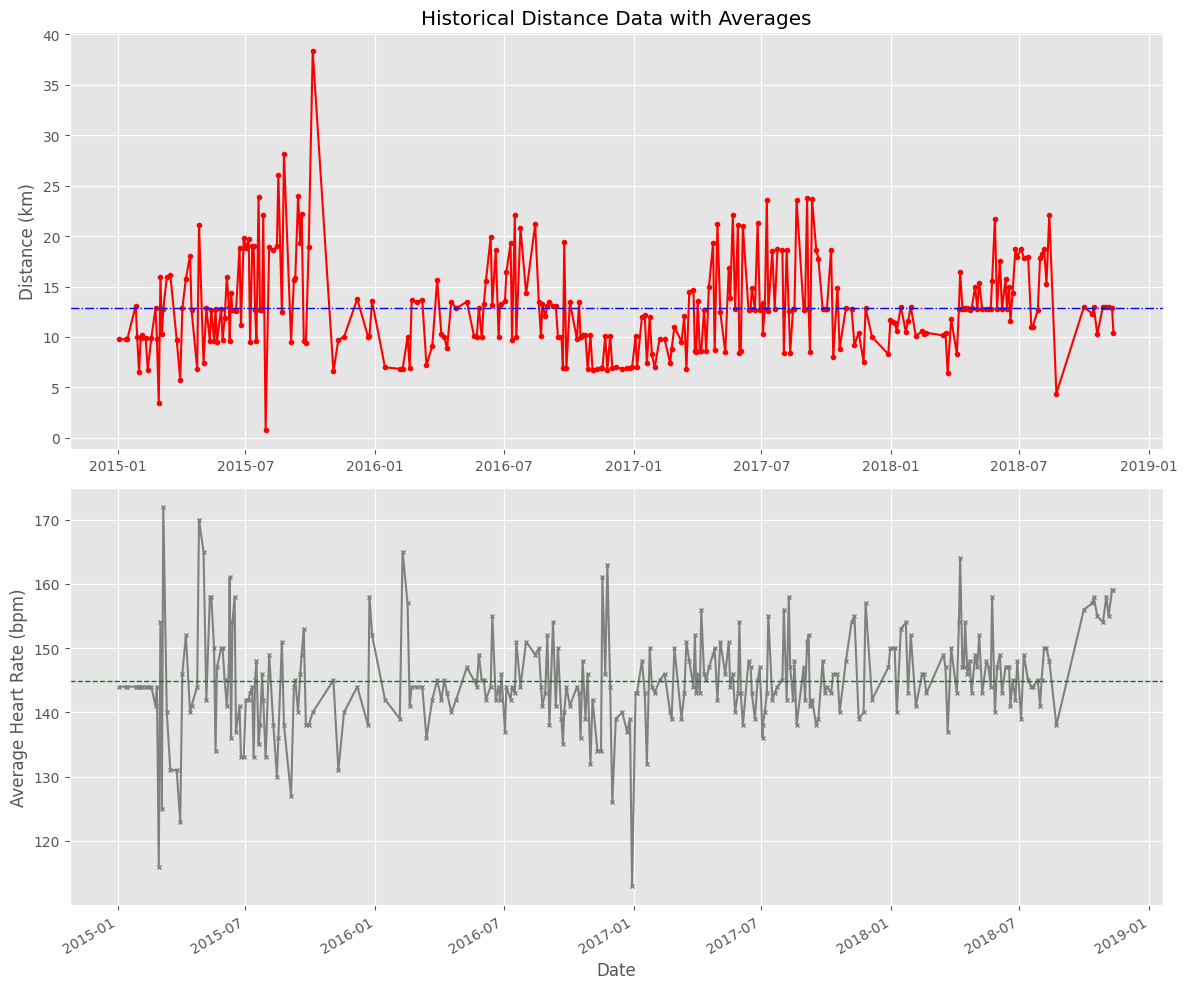

In [1]:
# Import pandas under the alias pd
import pandas as pd

# Load the dataset into a variable called df_activities
file_path = 'C:/Users/KIIT/Downloads/cardioActivities.csv'
df_activities = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date', dayfirst=True)

# Task 1: Delete unnecessary columns
cols_to_drop = ['Friends Tagged', 'Route Name', 'GPX File', 'Activity Id', 'Calories Burned', 'Notes']
df_activities = df_activities.drop(columns=cols_to_drop)

# Task 2: Calculate the activity type counts
activity_type_counts = df_activities['Type'].value_counts()
print("Activity Type Counts:")
print(activity_type_counts)

# Task 3: Rename 'Other' values to 'Unicycling' in the Type column
df_activities['Type'] = df_activities['Type'].replace('Other', 'Unicycling')

# Task 4: Count the missing values in each column
missing_values_count = df_activities.isnull().sum()
print("\nMissing Values Count:")
print(missing_values_count)

# Check the column names to verify if 'Distance' exists
print("\nColumn Names in the DataFrame:")
print(df_activities.columns)

# Implementing mean imputation for missing values
# Calculate the sample mean for Average Heart Rate (bpm) for the 'Running' activity type
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()

# Create a filtered DataFrame for Running activities
df_run = df_activities[df_activities['Type'] == 'Running'].copy()

# Fill in the missing values for Average Heart Rate (bpm) in df_run
df_run['Average Heart Rate (bpm)'] = df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run))

# Ensure that the index is properly set as DatetimeIndex
df_run.index = pd.to_datetime(df_run.index, dayfirst=True)

# Sort the DataFrame by the index to ensure chronological order
df_run = df_run.sort_index()

# Now subset the data for the period from 2015 to 2018
runs_subset_2015_2018 = df_run.loc['2015-01-01':'2018-12-31']

# Task 5: Resample the data annually and weekly
# Before resampling, check if the 'Distance' column exists, or modify if another column represents this data.
if 'Distance (km)' in df_activities.columns:
    distance_col = 'Distance (km)'  # Use this column if it exists
elif 'Distance' in df_activities.columns:
    distance_col = 'Distance'
else:
    raise KeyError("No suitable 'Distance' column found in the dataset.")

# Resample annually to calculate the average distance and average heart rate
annual_stats = runs_subset_2015_2018.resample('Y').agg({
    distance_col: 'mean',
    'Average Heart Rate (bpm)': 'mean'
})

print("\nAnnual Statistics (2015-2018):")
print(annual_stats)

# Resample weekly to calculate the same metrics
weekly_stats = runs_subset_2015_2018.resample('W').agg({
    distance_col: 'mean',
    'Average Heart Rate (bpm)': 'mean'
})

print("\nWeekly Statistics (2015-2018):")
print(weekly_stats)

# Import matplotlib, set style, and ignore warnings
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

# Plot the annual statistics
annual_stats.plot(subplots=True,
                  sharex=False,
                  figsize=(12, 8),
                  linestyle='-',
                  marker='o',
                  markersize=5,
                 )

plt.title("Annual Statistics (2015-2018)")
plt.show()

# Plot the weekly statistics
weekly_stats.plot(subplots=True,
                  sharex=False,
                  figsize=(12, 16),
                  linestyle='-',
                  marker='o',
                  markersize=3,
                 )

plt.title("Weekly Statistics (2015-2018)")
plt.show()

# Task 6: Create custom subplots for historical data with averages
# Prepare data
runs_distance = runs_subset_2015_2018[distance_col]
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

# Create plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot and customize first subplot (Distance)
ax1.plot(runs_distance, color='red', marker='o', markersize=3, linestyle='-')
ax1.set(ylabel='Distance (km)', title='Historical Distance Data with Averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

# Plot and customize second subplot (Heart Rate)
runs_hr.plot(ax=ax2, color='gray', marker='x', markersize=3, linestyle='-')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='green', linewidth=1, linestyle='--')

# Show plot
plt.tight_layout()
plt.show()
